# **CUSTOMER PERSONALITY ANALYSIS**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

In [ ]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
%matplotlib inline
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#laoding the data
data=pd.read_csv('/content/marketing_campaign (1).csv', sep='\t')

In [ ]:
#preview of the data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Undergraduate,single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,married,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,married,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Postgraduate,married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
#number of rows and columns
data.shape

(2240, 29)

# Missing Values and duplicates

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

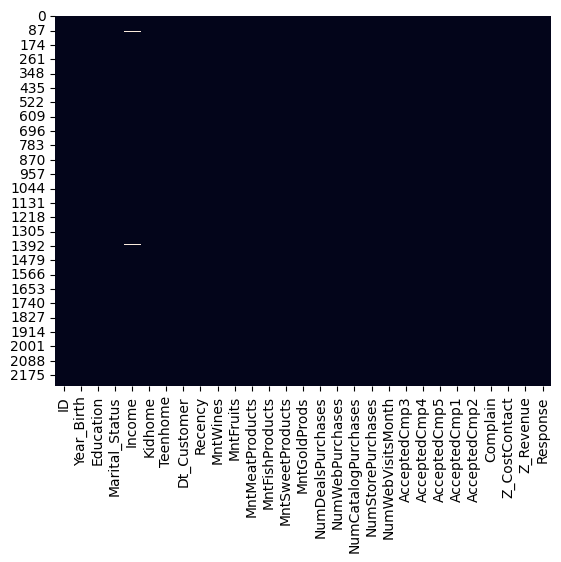

In [ ]:
#visualizing the missingness
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
#filling the income column with median income
data['Income']=data['Income'].fillna(data['Income'].mean())

In [ ]:
#checking for duplicates
data.duplicated().sum()

0

In [ ]:
#checking for the unique values in all columns
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

The columns Z_CostContact and Z_Revenue have only one unique value: hence these column will not have any value to modelling

In [ ]:
#dropping columns
data=data.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [ ]:
df.drop(columns=["ID","Dt_Customer"], inplace= True)

# Transforming the columns

In [ ]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
#replacing the values in the education with either undergraduate or post graduate
data['Education']=data['Education'].replace(['Graduation','Basic'], 'Undergraduate')
data['Education']=data['Education'].replace(['PhD','Master','2n Cycle'],'Postgraduate')

In [ ]:
data['Education'].value_counts()

Education
Undergraduate    1181
Postgraduate     1059
Name: count, dtype: int64

In [ ]:
#value counts of the marital status
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
#Replacing the values in the marriage column with either single or marrried
data['Marital_Status']=data['Marital_Status'].replace(['Married','Together'],'married')
data['Marital_Status']=data['Marital_Status'].replace(['Single','Divorced','Widow','Alone', 'YOLO','Absurd'],'single')

In [ ]:
#Amount spent by the customers for all the products
# new column
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

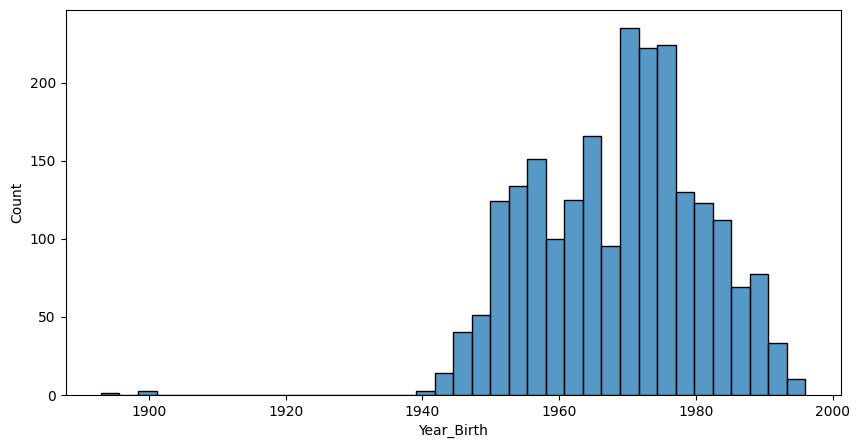

In [ ]:
#Visualize customers according to the birth year
plt.figure(figsize=(10,5))
sns.histplot(data['Year_Birth'])
plt.show()

# **Exploring Data Analysis**

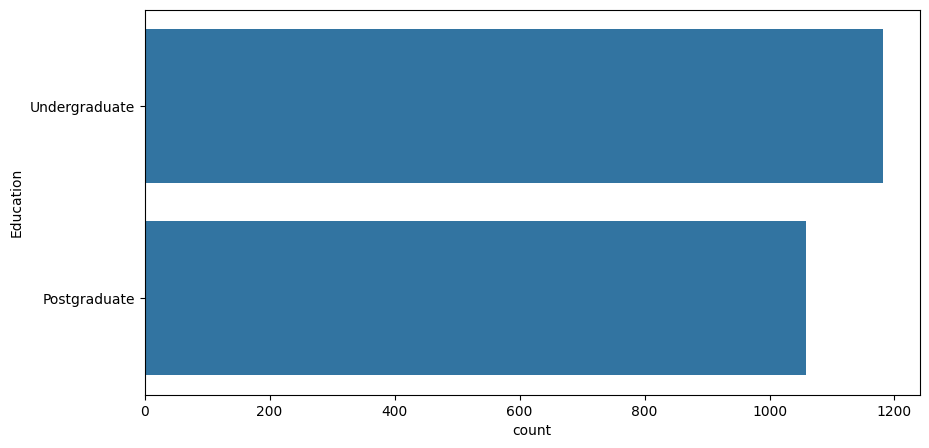

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Education'])
plt.show()

Graduates are more than people with phd or masters

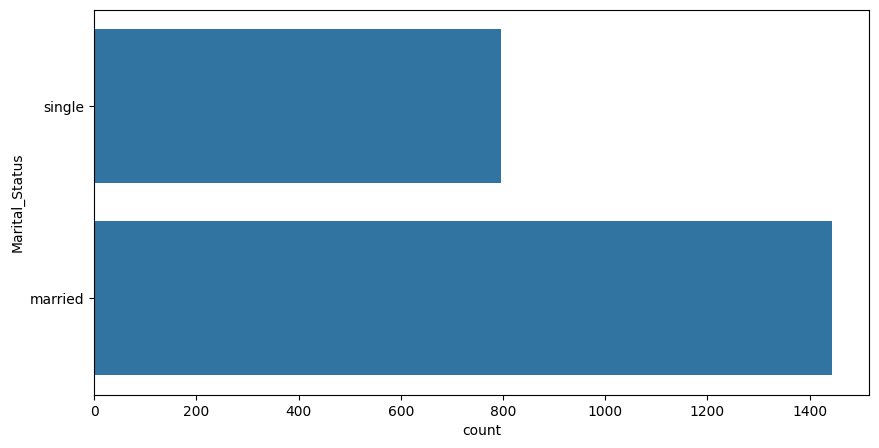

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Marital_Status'])
plt.show()

Married people are more than the singles, divorced and widows.

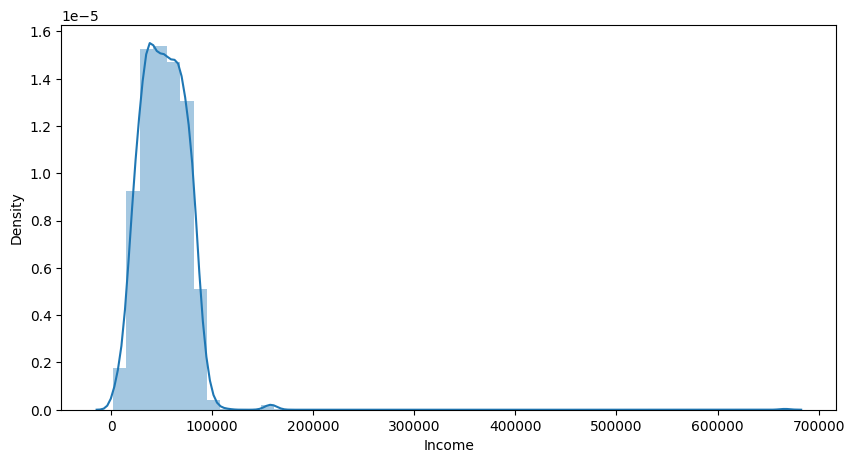

In [ ]:
#the income distribution of this customer segment
plt.figure(figsize=(10,5))
sns.distplot(data['Income'])
plt.show()

The income is right skewed, with most customers having a income below 10,000


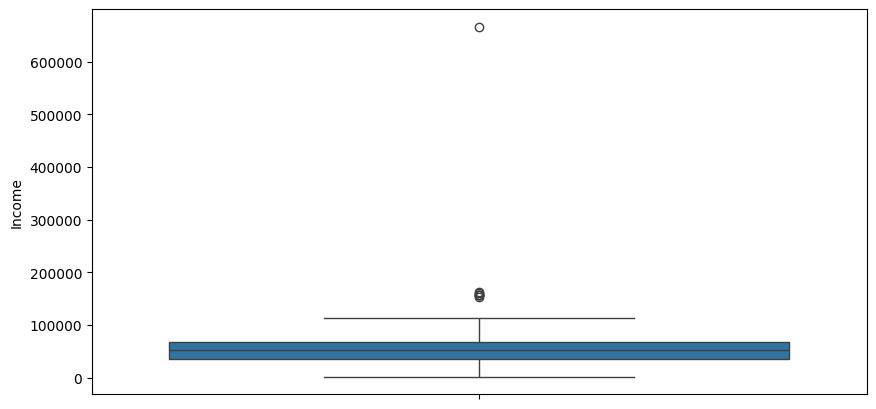

In [ ]:
#boxplot to view customers' income
plt.figure(figsize=(10,5))
sns.boxplot(data['Income'])
plt.show()